In [51]:
import pandas as pd
import geopandas
import folium
import matplotlib.pyplot as plt

In [52]:
df1 = pd.read_csv('volcano_data_2010.csv')

# Keep only relevant columns
df = df1.loc[:, ("Year", "Name", "Country", "Latitude", "Longitude", "Type")]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Year       63 non-null     int64  
 1   Name       63 non-null     object 
 2   Country    63 non-null     object 
 3   Latitude   63 non-null     float64
 4   Longitude  63 non-null     float64
 5   Type       63 non-null     object 
dtypes: float64(2), int64(1), object(3)
memory usage: 3.1+ KB


In [53]:
geometry = geopandas.points_from_xy(df.Longitude, df.Latitude)
geo_df = geopandas.GeoDataFrame(df[['Year','Name','Country', 'Latitude', 'Longitude', 'Type']], geometry=geometry)

geo_df.head()


Year                    Name        Country  Latitude  Longitude  \
0  2010              Tungurahua        Ecuador    -1.467    -78.442   
1  2010        Eyjafjallajokull        Iceland    63.630    -19.620   
2  2010                  Pacaya      Guatemala    14.381    -90.601   
3  2010                 Sarigan  United States    16.708    145.780   
4  2010  Karangetang [Api Siau]      Indonesia     2.780    125.480   

              Type                    geometry  
0    Stratovolcano  POINT (-78.44200 -1.46700)  
1    Stratovolcano  POINT (-19.62000 63.63000)  
2  Complex volcano  POINT (-90.60100 14.38100)  
3    Stratovolcano  POINT (145.78000 16.70800)  
4    Stratovolcano   POINT (125.48000 2.78000)

Text(0.5, 1.0, 'Volcanoes')

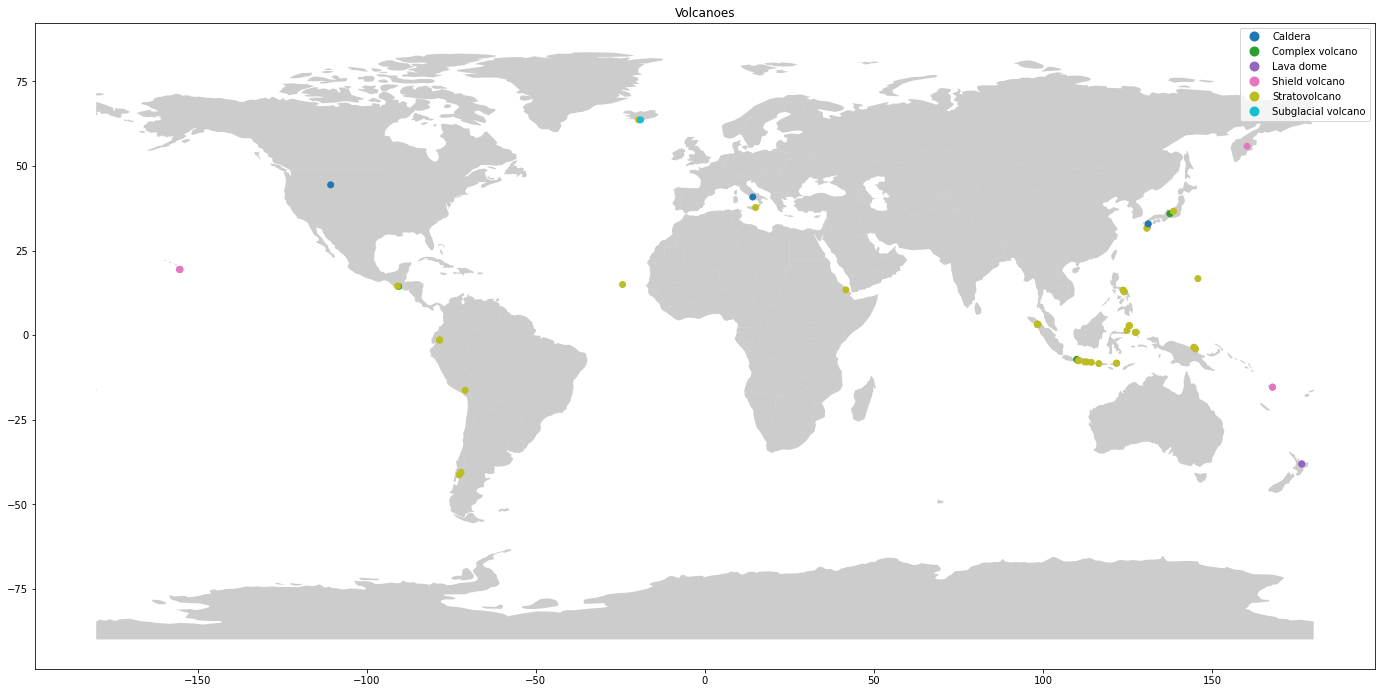

In [54]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
df.Type.unique()
fig, ax = plt.subplots(figsize=(24,18))
world.plot(ax=ax, alpha=0.4, color='grey')
geo_df.plot(column='Type', ax=ax, legend=True)
plt.title('Volcanoes')


In [55]:
# Stamen Terrain
map = folium.Map(location = [13.406,80.110], tiles = "Stamen Terrain", zoom_start = 9)
map


In [56]:
# OpenStreetMap
map = folium.Map(location = [13.406,80.110], tiles='OpenStreetMap' , zoom_start = 9)
map


In [57]:
# Stamen Toner
map = folium.Map(location = [13.406,80.110], tiles='Stamen Toner', zoom_start = 9)
map


In [58]:
# Use terrain map layer to see volcano terrain
map = folium.Map(location = [4,10], tiles = "Stamen Terrain", zoom_start = 3)
# Create a geometry list from the GeoDataFrame
geo_df_list = [[point.xy[1][0], point.xy[0][0]] for point in geo_df.geometry ]

# Iterate through list and add a marker for each volcano, color-coded by its type.
i = 0
for coordinates in geo_df_list:
    #assign a color marker for the type of volcano, Strato being the most common
    if geo_df.Type[i] == "Stratovolcano":
        type_color = "green"
    elif geo_df.Type[i] == "Complex volcano":
        type_color = "blue"
    elif geo_df.Type[i] == "Shield volcano":
        type_color = "orange"
    elif geo_df.Type[i] == "Lava dome":
        type_color = "pink"
    else:
        type_color = "purple"


    # Place the markers with the popup labels and data
    map.add_child(folium.Marker(location = coordinates,
                            popup =
                            "Year: " + str(geo_df.Year[i]) + '<br>' +
                            "Name: " + str(geo_df.Name[i]) + '<br>' +
                            "Country: " + str(geo_df.Country[i]) + '<br>'
                            "Type: " + str(geo_df.Type[i]) + '<br>'
                            "Coordinates: " + str(geo_df_list[i]),
                            icon = folium.Icon(color = "%s" % type_color)))

In [59]:
# This example uses heatmaps to visualize the density of volcanoes
# which is more in some parts of the world compared to others.

from folium import plugins

map = folium.Map(location = [15,30], tiles='Cartodb dark_matter', zoom_start = 2)

heat_data = [[point.xy[1][0], point.xy[0][0]] for point in geo_df.geometry ]

heat_data
plugins.HeatMap(heat_data).add_to(map)

map